# Regresion

## Regresion lineal y regularizacion

In [2]:
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

boston=load_boston()
df=pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price']=boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
?load_boston

In [4]:
X=df.drop('Price', axis=1)
y=df.Price

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [7]:
# modelos

linreg=LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
lasso=Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
ridge=Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
elastic=ElasticNet(alpha=0.01)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
train_score=linreg.score(X_train, y_train)
test_score=linreg.score(X_test, y_test)
print (train_score, test_score)

0.748100021394221 0.6990862349812188


In [12]:
train_score=lasso.score(X_train, y_train)
test_score=lasso.score(X_test, y_test)
print (train_score, test_score)

0.6860427119916477 0.6879857530739206


In [13]:
train_score=ridge.score(X_train, y_train)
test_score=ridge.score(X_test, y_test)
print (train_score, test_score)

0.745064329004498 0.7046320018888819


In [24]:
train_score=elastic.score(X_train, y_train)
test_score=elastic.score(X_test, y_test)
print (train_score, test_score)

0.7417335555773477 0.7050253678250442


In [ ]:
from sklearn.metrics import mean_squared_error as mse

rmse=mse(y_test, elastic.predict(X_test))**(0.5)
rmse

## SVR

In [28]:
import warnings
warnings.simplefilter('ignore')

from sklearn.svm import SVR

svr=SVR()
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
train_score=svr.score(X_train, y_train)
test_score=svr.score(X_test, y_test)
print (train_score, test_score)

0.13870643771270086 -0.007770532133630548


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor as RFR

rf=RFR()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [31]:
train_score=rf.score(X_train, y_train)
test_score=rf.score(X_test, y_test)
print (train_score, test_score)

0.9641054425304734 0.9100261155630658


In [41]:
# gridsearching
from sklearn.model_selection import GridSearchCV

def grid(modelo, param, cv=5):
    grid=GridSearchCV(modelo, param, cv=cv, iid=True, n_jobs=-1)
    grid.fit(X, y)
    
    print (grid.score(X_train, y_train), grid.score(X_test, y_test))
    print (grid.best_params_)
    print (grid.best_score_)
    
    return grid.best_estimator_.fit(X_train, y_train)

In [51]:
param={'max_leaf_nodes':[5,10,20, 50], 'n_estimators':[i+1 for i in range(50) if i%5==0]}

%time grid(rf, param)

0.9269079993664873 0.9272174727628295
{'max_leaf_nodes': 20, 'n_estimators': 26}
0.6405917428227192
CPU times: user 682 ms, sys: 109 ms, total: 791 ms
Wall time: 3.3 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=26,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [52]:
rf_gs= grid(rf, param)

0.9654656824155339 0.9664968397541917
{'max_leaf_nodes': 50, 'n_estimators': 41}
0.6346123658088841


In [53]:
y_pred=rf_gs.predict(X_test)
y_pred

array([15.10215993, 33.0976862 , 22.80993398, 10.12511922, 14.75229614,
       10.56161799, 33.63494325, 20.54940274, 48.36117605, 21.3134652 ,
       16.71350856, 19.77906526, 21.72803598, 23.75965768, 22.98082279,
       19.76476245, 22.64803555, 19.32675558, 34.33969717, 22.28035147,
       34.05006957, 21.10632131, 24.4240702 , 36.36910439, 17.16896342,
       37.34199808,  7.98149981, 11.69909834, 20.2113765 , 10.96988706,
       17.83996375, 20.1229443 , 20.71704645, 44.88258619, 24.45327293,
       15.15320484, 20.54703638, 17.49988364, 24.20755377, 19.78584049,
       11.8572506 , 45.22734086, 22.21725151, 15.93101502, 15.91644934,
       27.16267701, 22.59956982, 20.63193348, 26.41028385, 21.94139486,
       14.77402711, 32.83274907, 20.12205549, 14.95785312, 22.76852036,
       33.34084544, 17.35174604, 30.92975437, 15.24520842, 29.95071108,
       36.33306706, 31.83956688, 29.25225602, 12.39146735, 23.15366757,
       19.78878778, 20.94032828, 23.82392618, 19.10213747, 23.86

In [54]:
from sklearn.tree import ExtraTreeRegressor as ETR

etr=ETR(min_samples_leaf=2)
etr.fit(X_train, y_train)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                   max_leaf_nodes=None, min_impurity_decrease=0.0,
                   min_impurity_split=None, min_samples_leaf=2,
                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                   random_state=None, splitter='random')

In [48]:
train_score=etr.score(X_train, y_train)
test_score=etr.score(X_test, y_test)
print (train_score, test_score)

0.9552322876768367 0.8096757903783823


# Clasificacion

## Regresion logistica

In [58]:
# Version Custom

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from numba import jit

In [59]:
# funcion sigmoide

def f(X,a):
    return 1./(1.+np.exp(-np.dot(X,a)))

In [60]:
# funcion de coste o perdida

@jit()
def coste(X,a,y,lambda_reg):              # funcion coste, funcion a minimizar 
    return -(np.sum(np.log(f(X,a)))+np.dot((y-1).T,(np.dot(X,a))))/y.size+lambda_reg/(2.0*y.size)*np.dot(a[1:],a[1:])

In [61]:
@jit()
def grad_coste(X,a,y,lambda_reg):          # gradiente de la funcion coste con regularizacion
    return (np.dot(X.T,(f(X,a)-y)))/y.size+lambda_reg/(2.0*y.size)*np.concatenate(([0], a[1:])).T

In [62]:
def normalizador(X):                # normalizador de X
    X_media=X.mean(axis=0)          # media de X
    X_std=X.std(axis=0)             # desviacion estandar de X
    X_std[X_std==0]=1.0             # si hay alguna std=0 ponla a 1
    X=(X-X_media)/X_std             # normaliza
    X=np.insert(X, 0, 1, axis=1)    # esta linea añade una columna de 1, feature engineering [1, f1, f2.., fn, f1f2...] (mejora un 10%)
    return X

In [63]:
datos=pd.read_csv('data/train_numeros.csv')
datos.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
matriz_datos=datos.values
matriz_datos.shape

(42000, 785)

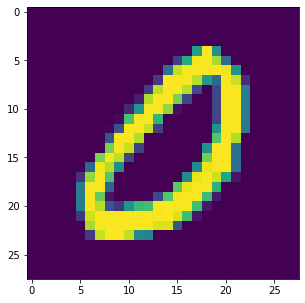

In [73]:
plt.figure(figsize=(5,5))
plt.imshow(matriz_datos[17, 1:].reshape(28,28))
plt.show()

In [69]:
Y=np.zeros((matriz_datos.shape[0], 10))
for i in range(10):
    Y[:,i]=np.where(matriz_datos[:, 0]==i, 1, 0)
print (Y[0:10, :])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [70]:
etiquetas=matriz_datos[:,0]
X=matriz_datos[:, 1:]
X.shape

(42000, 784)

In [71]:
X=X[:, X.sum(axis=0)!=0]
X.shape

(42000, 708)

In [74]:
X_train, Y_train=X[0:30000, :], Y[0:30000, :]
etiquetas_train=etiquetas[0:30000]

In [75]:
X_test, Y_test=X[30000:, :], Y[30000:, :]
etiquetas_test=etiquetas[30000:]

In [76]:
X_train_sk=X_train.copy()
X_test_sk=X_test.copy()

In [77]:
X_train=normalizador(X_train)
X_test=normalizador(X_test)

In [78]:
val_inicial=np.random.rand(X_train.shape[1])

In [79]:
A_opt=np.zeros((X_train.shape[1], 10))

In [80]:
lambda_reg=100.

In [83]:
# optimizacion
inicio_opt=time.time()
for i in range(10):
    print ('\nOptimizando {} frente al resto'.format(i))
    
    def opt_coste(a):
        return coste(X_train, a, Y_train[:, i], lambda_reg)
    
    def opt_grad_coste(a):
        return grad_coste(X_train, a, Y_train[:, i], lambda_reg)
    
    metodo='trust-constr'
    i_opt=time.time()
    
    modelo=minimize(opt_coste, val_inicial, method=metodo, jac=opt_grad_coste, tol=1e-4, options={'disp':True})
    
    print ('Tiempo opt: {}'.format(time.time()-i_opt))
    
    A_opt[:, i]=modelo.x
    
t_custom=time.time()-inicio_opt
print ('Tiempo total: {}'.format(t_custom))


Optimizando 0 frente al resto
`gtol` termination condition is satisfied.
Number of iterations: 62, function evaluations: 62, CG iterations: 353, optimality: 5.45e-05, constraint violation: 0.00e+00, execution time:  2.2 s.
Tiempo opt: 2.6348421573638916

Optimizando 1 frente al resto
`gtol` termination condition is satisfied.
Number of iterations: 46, function evaluations: 46, CG iterations: 238, optimality: 9.74e-05, constraint violation: 0.00e+00, execution time:  1.6 s.
Tiempo opt: 1.6432831287384033

Optimizando 2 frente al resto
`gtol` termination condition is satisfied.
Number of iterations: 62, function evaluations: 62, CG iterations: 349, optimality: 7.47e-05, constraint violation: 0.00e+00, execution time:  2.3 s.
Tiempo opt: 2.2919952869415283

Optimizando 3 frente al resto
`gtol` termination condition is satisfied.
Number of iterations: 56, function evaluations: 56, CG iterations: 306, optimality: 7.03e-05, constraint violation: 0.00e+00, execution time:  2.0 s.
Tiempo opt:

In [84]:
y_pred=[]                  # etiquetas predichas
y_prob=[]                  # probabilidades de las etiquetas predichas

def resumen(datos):        # testeo
    for e in datos:
        nombre, etiqueta, Xs=e         
        etiq=etiqueta.size
        probs=np.zeros((etiq,2))      # etiquetas con su probabilidad
        cuenta=0                      # conteo de aciertos
        for muestra in range(etiq): 
            for n in range(10):
                alfa=A_opt[:,n]       # parametros de softmax
                probs[n,0]=n
                probs[n,1]=f(Xs[muestra,:],alfa)      # evaluacion de la prediccion
                
            probs=probs[probs[:,1].argsort()[::-1]]   # se pone la prob mas alta al principio
            y_pred.append(probs[0,0])
            y_prob.append(probs[0,1])
            if probs[0,0]==etiqueta[muestra]:         # si se acierta +1
                cuenta+=1
        print ("\n{}".format(nombre))
        print ("{} correctos de {} ==> {:.4}% correcto".format(cuenta, etiq, cuenta/etiq*100))

In [85]:
resumen([('Entranamiento  :', etiquetas_train, X_train)])
resumen([('Test  :', etiquetas_test, X_test)])


Entranamiento  :
27948 correctos de 30000 ==> 93.16% correcto

Test  :
10979 correctos de 12000 ==> 91.49% correcto


In [100]:
df=pd.DataFrame(A_opt, columns=[i+1 for i in range(A_opt.shape[1])])  # se guardan los parametros softmax en csv
#df.to_csv('alfas.csv', index=False)
df.head()

,1,2,3,4,5,6,7,8,9,10
0,-9.135333,-11.072623,-6.263494,-6.433293,-8.817327,-6.357304,-8.386161,-8.768231,-5.354880,-7.568052
1,-0.000154,-0.001891,-0.006034,-0.006346,-0.003047,-0.010450,0.009206,-0.000621,-0.009780,-0.002956
2,-0.002646,0.005608,0.000239,-0.002166,-0.005804,0.002928,0.010238,0.004819,0.002308,-0.004590
3,0.001030,-0.002578,0.010749,0.001766,0.002058,-0.005203,-0.011663,-0.002932,0.000374,0.003482
4,-0.000597,0.001873,0.010018,0.002629,-0.000373,0.002053,-0.006466,0.000710,0.005352,0.001215


In [87]:
# Version sklearn

from sklearn.linear_model import LogisticRegression

In [96]:
ini_opt_sk=time.time()

logreg=LogisticRegression(C=0.01, penalty='l2', tol=0.0001, max_iter=70, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train_sk, etiquetas_train)
t_sklearn=time.time()-ini_opt_sk
t_sklearn

4.033091068267822

In [97]:
def resumen_sk(datos):
    for e in datos:
        nombre, etiqueta, Xs=e
        etiq=etiqueta.size
        
        y_pred_sk=logreg.predict(Xs)
        
        cuenta=0
        for muestra in range(etiq):
            if y_pred_sk[muestra]==etiqueta[muestra]:         
                cuenta+=1
        
        print ("\n{}".format(nombre))
        print ("{} correctos de {} ==> {:.4}% correcto".format(cuenta, etiq, cuenta/etiq*100))

In [98]:
resumen_sk([('Entranamiento  :', etiquetas_train, X_train_sk)])
resumen_sk([('Test  :', etiquetas_test, X_test_sk)])


Entranamiento  :
28108 correctos de 30000 ==> 93.69% correcto

Test  :
11014 correctos de 12000 ==> 91.78% correcto


In [99]:
print ('SkLearn es {:.2f} veces más rapido.'.format(t_custom/t_sklearn))

SkLearn es 5.42 veces más rapido.


## Arboles 

In [108]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier as DTC



dt=DTC()
dt.fit(load_iris().data, load_iris().target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [110]:
'''
train_score=dt.score(X_train, etiquetas_train)
test_score=dt.score(X_test, etiquetas_test)
print (train_score, test_score)
'''

'\ntrain_score=dt.score(X_train, etiquetas_train)\ntest_score=dt.score(X_test, etiquetas_test)\nprint (train_score, test_score)\n'

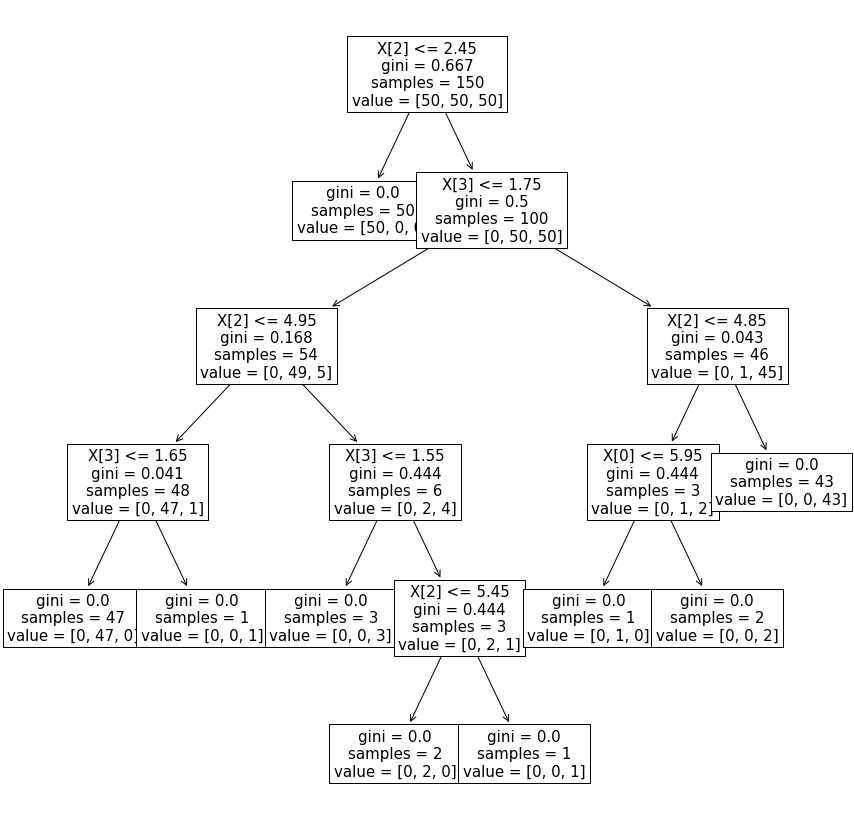

In [113]:
%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(dt, fontsize=15);

In [114]:
# forest

from sklearn.ensemble import RandomForestClassifier as RFC

rf=RFC()
rf.fit(X_train, etiquetas_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [115]:
train_score=rf.score(X_train, etiquetas_train)
test_score=rf.score(X_test, etiquetas_test)
print (train_score, test_score)

0.9991333333333333 0.9271666666666667


In [116]:
# SVC

from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train, etiquetas_train)

train_score=svc.score(X_train, etiquetas_train)
test_score=svc.score(X_test, etiquetas_test)
print (train_score, test_score)

0.9848333333333333 0.9588333333333333


In [120]:
from sklearn.datasets import make_circles
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


X, y = make_circles(noise=0.2, 
                    factor=0.5, 
                    random_state=1)




n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=10, 
                               n_jobs = -1, 
                               scoring='roc_auc')

rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [122]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
rf_random.best_score_

0.8848529411764706

In [124]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [125]:
rf_random.cv_results_

{'mean_fit_time': array([ 1.71473098,  0.44344624,  3.11133361,  0.44114463,  2.40443301,
         3.11821   ,  0.67727137,  0.6800859 ,  2.8265961 ,  2.30781468,
         0.35283764,  3.59448361,  1.74251318,  1.4877797 ,  1.09470868,
         0.47083815,  2.40910657,  0.48657433,  2.95731306,  4.47746428,
         3.35671433,  3.62420464,  2.13955164,  3.71407127,  2.66029342,
         2.7407589 ,  2.93499708,  3.3423876 ,  5.00477266,  3.25079576,
         0.40654826,  5.57955154,  3.43911163,  0.54792245,  3.66626565,
         4.64754128,  1.38290739,  3.44273806,  2.81830176,  4.57096807,
         0.90118233,  1.75817696,  1.18569779,  1.17049869,  1.78092869,
         4.19298037,  3.65895446,  4.76511558,  2.27942737,  1.85977411,
         4.29758406,  0.89373859,  3.04779037,  0.51121799,  2.4193244 ,
         1.32492399,  1.33720469,  1.34426435,  4.10090367,  2.43347764,
         4.34521898,  1.85394708,  3.92516176,  5.57634314,  2.05806557,
         2.85612885,  1.46581395, 